In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os
import geopandas as gpd
from shapely.geometry import box
from shapely.geometry import box, Polygon, MultiPolygon

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
# full_rain = pd.read_csv(os.path.join(folder_path, "precipitation_galapagos.csv"))
full_rain = pd.read_csv(os.path.join(folder_path, "rain_by_day.csv"))

# These are for Piton de la Fournaise
#eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_reunion.csv"))
#average_rain = pd.read_csv(os.path.join(folder_path, "average_reunion.csv"))

# These are all for the Galapagos
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos2.csv"))
#climate_bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
#average_rain = climate_bellavista[['observation_date', 'precipitation']]
climate_ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))
average_ayora = climate_ayora[['observation_date', 'precipitation']]

# This is the ONI water surface temperature for El Nino
oni = pd.read_csv(os.path.join(folder_path, "oni.csv"))

In [4]:
# #This drops the weird ones. Now I just need to convert all lats/longs to floats and then drop duplicate day/lat/long. Once this is done, I should save it as a new csv
# longs = np.array(full_rain['Longitude'].drop_duplicates())
# for i in range(4):
#     full_rain = full_rain[~(full_rain['Longitude'] == longs[-i-1])]

# full_rain['Longitude'] = full_rain['Longitude'].apply(lambda x: float(x))
# full_rain['Latitude'] = full_rain['Latitude'].apply(lambda x: float(x))
# full_rain['Precipitation'] = full_rain['Precipitation'].apply(lambda x: float(x))

# print(full_rain)

In [30]:
# full_rain.to_csv('cleaned_precip_galap.csv', index=False)

In [31]:
# didn't drop anything
# full_rain_no_duplicates = full_rain.drop_duplicates(subset=['Date', 'Longitude', 'Latitude'])
# print(full_rain_no_duplicates)

In [23]:
# string_frame = full_rain[full_rain['Longitude'].apply(lambda x: isinstance(x, str))]
# print(string_frame)
# string_dates = np.array(string_frame['Date'].drop_duplicates())
# print(string_dates)

In [22]:
# float_frame = full_rain[full_rain['Longitude'].apply(lambda x: isinstance(x, float))]
# days = np.array(float_frame['Date'].drop_duplicates())
# print(np.shape(days))

In [4]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [5]:
#remove rows that don't have float in the longitude column. then apply it. then go by unique lat/lon/decimal
# mask = pd.to_numeric(full_rain['Longitude'], errors='coerce').notna()
# full_rain = full_rain[mask]
# full_rain['Decimal'] = full_rain.Date.apply(date_to_decimal_year) % 1
# print(full_rain)
unique_trips = full_rain.groupby(['Longitude', 'Latitude', 'Decimal'])['Precipitation'].mean()
print(unique_trips)

Longitude  Latitude  Decimal
-92.45     -2.15     0.0000     0.100487
                     0.0027     0.042370
                     0.0055     0.025692
                     0.0082     0.057774
                     0.0110     0.037602
                                  ...   
-87.15      2.05     0.9863     1.346080
                     0.9890     0.355902
                     0.9918     0.143509
                     0.9945     1.401139
                     0.9973     1.216352
Name: Precipitation, Length: 847530, dtype: float64


In [7]:
# full_rain.to_csv('rain_by_day.csv', index=False)

In [6]:
unique_trips_reset = unique_trips.reset_index()
print(unique_trips_reset)
longs = np.array(unique_trips_reset['Latitude'].drop_duplicates())
print(longs)

        Longitude  Latitude  Decimal  Precipitation
0          -92.45     -2.15   0.0000       0.100487
1          -92.45     -2.15   0.0027       0.042370
2          -92.45     -2.15   0.0055       0.025692
3          -92.45     -2.15   0.0082       0.057774
4          -92.45     -2.15   0.0110       0.037602
...           ...       ...      ...            ...
847525     -87.15      2.05   0.9863       1.346080
847526     -87.15      2.05   0.9890       0.355902
847527     -87.15      2.05   0.9918       0.143509
847528     -87.15      2.05   0.9945       1.401139
847529     -87.15      2.05   0.9973       1.216352

[847530 rows x 4 columns]
[-2.15 -2.05 -1.95 -1.85 -1.75 -1.65 -1.55 -1.45 -1.35 -1.25 -1.15 -1.05
 -0.95 -0.85 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15 -0.05  0.05  0.15
  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05  1.15  1.25  1.35
  1.45  1.55  1.65  1.75  1.85  1.95  2.05]


In [8]:
# print(lats)
# print(longs)

In [12]:
# original_array_2d = np.array([[1, 2, 3],
#                               [4, 5, 6],
#                               [7, 8, 9]])

# # Repeat each entry twice along each axis
# doubled_array_2d = np.repeat(original_array_2d, 10, axis=0)
# doubled_array_2d = np.repeat(doubled_array_2d, 10, axis=1)

# print("Original 2D array:\n", original_array_2d)
# print("Doubled 2D array:\n", doubled_array_2d)

In [7]:
def average_in_distance(arr, i, j, distance):
    rows, cols = arr.shape
    total = 0
    count = 0

    for x in range(max(0, i - distance), min(rows, i + distance + 1)):
        for y in range(max(0, j - distance), min(cols, j + distance + 1)):
            total += arr[x, y]
            count += 1

    return total / count

In [9]:
# shapefile_path = "/Users/jonathanquartin/Downloads/ECU_adm/ECU_adm0.shp"
# gdf = gpd.read_file(shapefile_path)

# # Plot the outline of the country

# minx, miny, maxx, maxy = -91.65, -1.05, -90.95, .15

# # Create a bounding box geometry
# bbox = box(minx, miny, maxx, maxy)

# # Filter the GeoDataFrame based on the bounding box
# filtered_gdf = gdf[gdf.geometry.intersects(bbox)]

# coordinates = []

# for index, row in filtered_gdf.iterrows():
#     geometry = row['geometry']

#     if isinstance(geometry, MultiPolygon):
#         for polygon in geometry.geoms:
#             # Extract coordinates from each polygon
#             x_coords, y_coords = polygon.exterior.xy
#             coordinates.extend(list(zip(x_coords, y_coords)))
#     elif isinstance(geometry, Polygon):
#         # Extract coordinates from a single Polygon
#         x_coords, y_coords = geometry.exterior.xy
#         coordinates.extend(list(zip(x_coords, y_coords)))

# # Print or use the coordinates as needed
# for coord in coordinates:
#     print(coord)

[-1.05 -0.95 -0.85 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15 -0.05  0.05
  0.15]


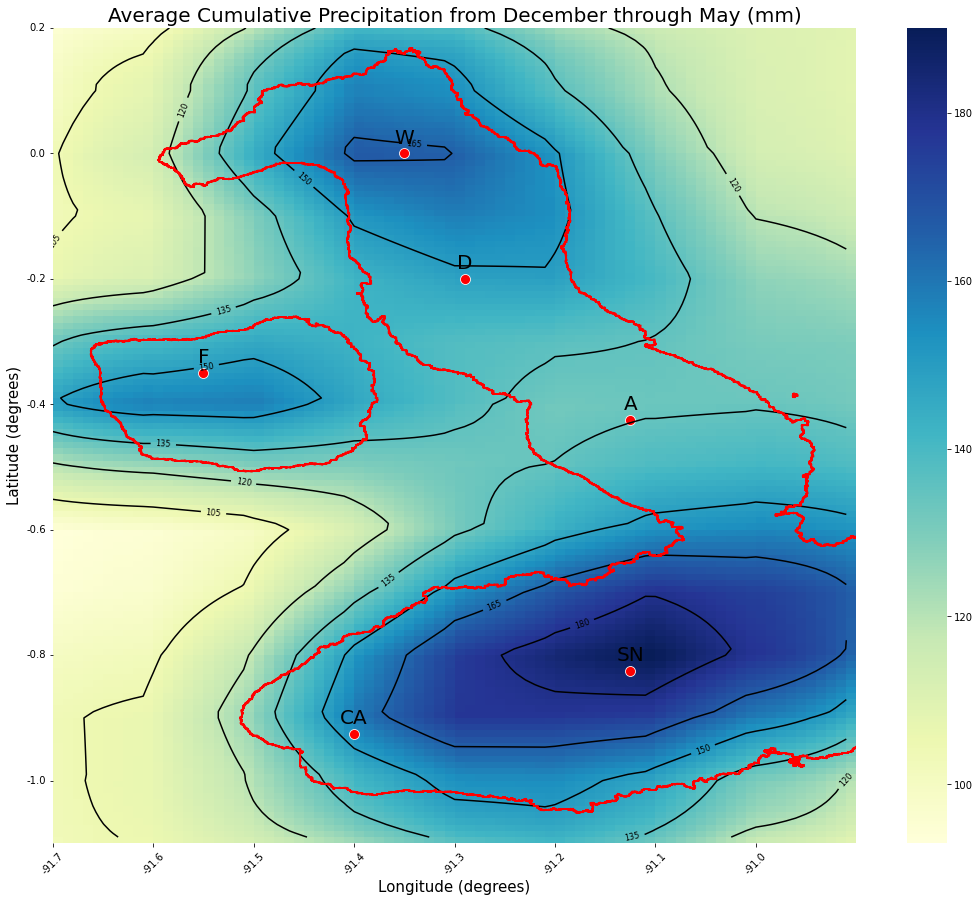

In [19]:
#make pixels smaller
#Finish bounding box for isabela island

#to_plot = unique_trips_reset.copy()
to_plot = unique_trips_reset[(unique_trips_reset['Longitude'] <= -90.95) & (unique_trips_reset['Latitude'] <= .15) & (unique_trips_reset['Latitude'] >= -1.05) & (unique_trips_reset['Longitude'] >= -91.65)]
longs = np.array(to_plot['Longitude'].drop_duplicates())
#print(longs)
lats = np.array(to_plot['Latitude'].drop_duplicates())
print(lats)
lats = lats[::-1]
#unique_trips_reset.dropna(inplace=True)
data = np.zeros((len(lats), len(longs)))
for i in range(len(lats)):
    for j in range(len(longs)):
        data[i][j] = to_plot['Precipitation'][(to_plot['Longitude'] == longs[j]) & (to_plot['Latitude'] == lats[i]) & ((to_plot['Decimal'] < 0.417) | (to_plot['Decimal'] >= 0.917))].sum()
        #data[i][j] = to_plot['Precipitation'][(to_plot['Longitude'] == longs[j]) & (to_plot['Latitude'] == lats[i]) & ((to_plot['Decimal'] >= 0.417) & (to_plot['Decimal'] < 0.917))].sum()
granular = 10

times_ten = np.repeat(data, granular, axis=0)
times_ten = np.repeat(times_ten, granular, axis=1)

rows, cols = times_ten.shape
result_array = np.zeros_like(times_ten, dtype=float)

distance = granular
for i in range(rows):
    for j in range(cols):
        result_array[i, j] = average_in_distance(times_ten, i, j, distance)

plt.figure(figsize=(18,15))
sns.heatmap(result_array, annot=False, fmt=".2f", cmap="YlGnBu")
contour = plt.contour(result_array, colors='k')
plt.clabel(contour, inline=True, fontsize=8)

plt.title("Average Cumulative Precipitation from December through May (mm)", fontsize='20')
plt.xlabel("Longitude (degrees)", fontsize='15')
plt.ylabel("Latitude (degrees)", fontsize='15')
plt.yticks([granular*2*i for i in range(7)], [round(.2 - (.1 * 2*i), 2) for i in range(7)], rotation='horizontal')
plt.xticks([granular*i for i in range(8)], [round(-91.7 + (.1 * i), 2) for i in range(8)], rotation=45)

points = [(1.5*granular, 5.5*granular), (3.5*granular, 2*granular), (3*granular, 11.25*granular), (5.75*granular, 10.25*granular), (5.75*granular,6.25*granular), (4.1*granular,4*granular)]
labels = ['F', 'W', 'CA', 'SN', 'A', 'D']

x, y = zip(*points)

sns.scatterplot(x=x, y=y, marker='o', color='red', s=100)

for i in range(len(labels)):
    plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize='20')


shapefile_path = "/Users/jonathanquartin/Downloads/ECU_adm/ECU_adm0.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the outline of the country

minx, miny, maxx, maxy = -91.65, -1.05, -90.95, .15

# Create a bounding box geometry
bbox = box(minx, miny, maxx, maxy)

# Filter the GeoDataFrame based on the bounding box
filtered_gdf = gdf[gdf.geometry.intersects(bbox)]

for index, row in filtered_gdf.iterrows():
    geometry = row['geometry']
    coordinates = []
    if isinstance(geometry, MultiPolygon):
        for polygon in geometry.geoms:
            # Extract coordinates from each polygon
            x_coords, y_coords = polygon.exterior.xy
            coordinates.extend(list(zip(x_coords, y_coords)))
    elif isinstance(geometry, Polygon):
        # Extract coordinates from a single Polygon
        x_coords, y_coords = geometry.exterior.xy
        coordinates.extend(list(zip(x_coords, y_coords)))
    # if x[i] > -90.9:
    #     print(x[i], y[i])
    x = np.array([(i[0] + 91.7) * 100 for i in coordinates])
    y = np.array([(0.2 - i[1]) * 100 for i in coordinates])
    for i in range(len(x) - 1):
        if np.sqrt((x[i] - x[i+1])**2 + (y[i] - y[i+1])**2) < 10:
            plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='red', linestyle='-', linewidth=2)
#sns.scatterplot(x=x, y=y, color='black', s=2)


# Connect nearby points with lines


plt.savefig("rainy_seas_heatmap.jpg")
plt.show()

[-0.85 -0.75 -0.65 -0.55 -0.45 -0.35]


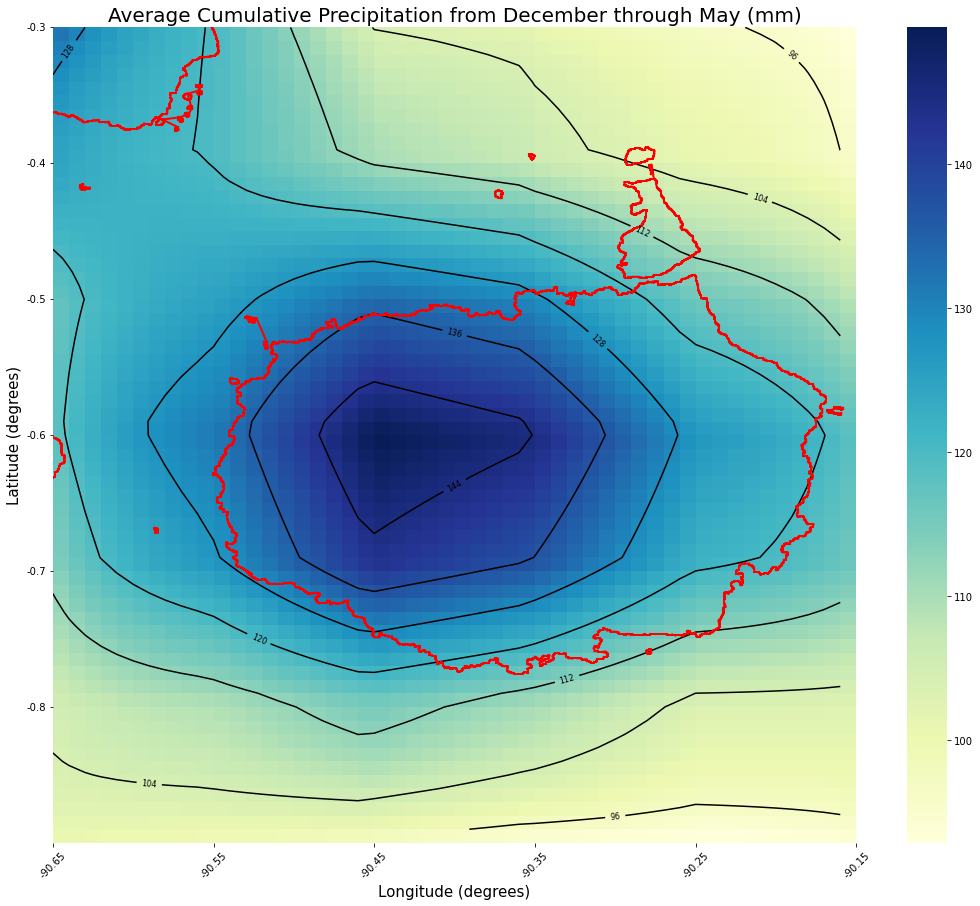

In [23]:
#make pixels smaller
#Santa Cruz
#Finish bounding box for isabela island

#to_plot = unique_trips_reset.copy()
to_plot = unique_trips_reset[(unique_trips_reset['Longitude'] <= -90.1) & (unique_trips_reset['Latitude'] <= -.35) & (unique_trips_reset['Latitude'] >= -.85) & (unique_trips_reset['Longitude'] >= -90.6)]
longs = np.array(to_plot['Longitude'].drop_duplicates())
#print(longs)
lats = np.array(to_plot['Latitude'].drop_duplicates())
print(lats)
lats = lats[::-1]
#unique_trips_reset.dropna(inplace=True)
data = np.zeros((len(lats), len(longs)))
for i in range(len(lats)):
    for j in range(len(longs)):
        data[i][j] = to_plot['Precipitation'][(to_plot['Longitude'] == longs[j]) & (to_plot['Latitude'] == lats[i]) & ((to_plot['Decimal'] < 0.417) | (to_plot['Decimal'] >= 0.917))].sum()
        #data[i][j] = to_plot['Precipitation'][(to_plot['Longitude'] == longs[j]) & (to_plot['Latitude'] == lats[i]) & ((to_plot['Decimal'] >= 0.417) & (to_plot['Decimal'] < 0.917))].sum()
granular = 10

times_ten = np.repeat(data, granular, axis=0)
times_ten = np.repeat(times_ten, granular, axis=1)

rows, cols = times_ten.shape
result_array = np.zeros_like(times_ten, dtype=float)

distance = granular
for i in range(rows):
    for j in range(cols):
        result_array[i, j] = average_in_distance(times_ten, i, j, distance)

plt.figure(figsize=(18,15))
sns.heatmap(result_array, annot=False, fmt=".2f", cmap="YlGnBu")
contour = plt.contour(result_array, colors='k')
plt.clabel(contour, inline=True, fontsize=8)

plt.title("Average Cumulative Precipitation from December through May (mm)", fontsize='20')
plt.xlabel("Longitude (degrees)", fontsize='15')
plt.ylabel("Latitude (degrees)", fontsize='15')
plt.yticks([granular*i for i in range(6)], [round(-.3 - (.1 *i), 2) for i in range(6)], rotation='horizontal')
plt.xticks([granular*i for i in range(6)], [round(-90.65 + (.1 * i), 2) for i in range(6)], rotation=45)

# points = [(1.5*granular, 5.5*granular), (3.5*granular, 2*granular), (3*granular, 11.25*granular), (5.75*granular, 10.25*granular), (5.75*granular,6.25*granular), (4.1*granular,4*granular)]
# labels = ['F', 'W', 'CA', 'SN', 'A', 'D']

# x, y = zip(*points)

# sns.scatterplot(x=x, y=y, marker='o', color='red', s=100)

# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize='20')


shapefile_path = "/Users/jonathanquartin/Downloads/ECU_adm/ECU_adm0.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the outline of the country

minx, miny, maxx, maxy = -90.6, -.75, -90.1, -.25

# Create a bounding box geometry
bbox = box(minx, miny, maxx, maxy)

# Filter the GeoDataFrame based on the bounding box
filtered_gdf = gdf[gdf.geometry.intersects(bbox)]

for index, row in filtered_gdf.iterrows():
    geometry = row['geometry']
    coordinates = []
    if isinstance(geometry, MultiPolygon):
        for polygon in geometry.geoms:
            # Extract coordinates from each polygon
            x_coords, y_coords = polygon.exterior.xy
            coordinates.extend(list(zip(x_coords, y_coords)))
    elif isinstance(geometry, Polygon):
        # Extract coordinates from a single Polygon
        x_coords, y_coords = geometry.exterior.xy
        coordinates.extend(list(zip(x_coords, y_coords)))
    # if x[i] > -90.9:
    #     print(x[i], y[i])
    x = np.array([(i[0] + 90.65) * 100 for i in coordinates])
    y = np.array([(-.3 - i[1]) * 100 for i in coordinates])
    for i in range(len(x) - 1):
        if np.sqrt((x[i] - x[i+1])**2 + (y[i] - y[i+1])**2) < 3:
            plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='red', linestyle='-', linewidth=2)
#sns.scatterplot(x=x, y=y, color='black', s=2)


# Connect nearby points with lines


plt.savefig("rainy_seas_heatmap.jpg")
plt.show()

/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_65599/2840036013.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


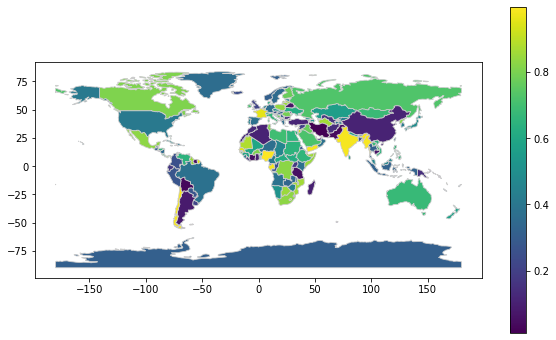

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Generate random data for the heatmap (matching the number of countries)
data = dict(zip(world['name'], np.random.rand(len(world))))

# Create a GeoDataFrame from the random data
gdf = world.join(pd.DataFrame(list(data.items()), columns=['name', 'value']).set_index('name'), on='name')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the heatmap using GeoPandas
gdf.plot(column='value', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot as needed

# Show the plot
plt.show()

In [5]:
# Converts date information from ONI into numerical format

date_converter = {'DJF': ('12', '03', '01'), 'JFM': ('01', '04', '02'), 'FMA': ('02', '05', '03'), 'MAM': ('03', '06', '04'), 'AMJ': ('04', '07', '05'), 'MJJ': ('05', '08', '06'), 'JJA': ('06', '09', '07'), 'JAS': ('07', '10', '08'), 'ASO': ('08', '11', '09'), 'SON': ('09', '12', '10'), 'OND': ('10', '01', '11'), 'NDJ': ('11', '02', '12')}

def convert_start(row):
    if row['SEAS'] == 'DJF':
        return str(row['YR']-1) + '-' + date_converter[row['SEAS']][0] + '-01'
    else:
        return str(row['YR']) + '-' + date_converter[row['SEAS']][0] + '-01' 

def convert_end(row):
    if row['SEAS'] == 'NDJ':
        return str(row['YR']+1) + '-' + date_converter[row['SEAS']][1] + '-01'
    else: 
        return str(row['YR']) + '-' + date_converter[row['SEAS']][1] + '-01' 

def convert_mid(row):
    return str(row['YR']) + '-' + date_converter[row['SEAS']][2] + '-15' 

oni['Start'] = oni.apply(convert_start, axis=1)
oni['End'] = oni.apply(convert_end, axis=1)
oni['Center'] = oni.apply(convert_mid, axis=1)

In [6]:
el_nino = oni[oni['ANOM'] >= .5]

In [7]:
non_nino_eruptions = pd.DataFrame()
for i in eruptions.iterrows():
    add = True
    for j in el_nino.iterrows():
        if i[1][1] >= j[1][4] and i[1][1] < j[1][5]:
            add = False
            break
    if add == True:
        non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)



/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_52391/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_52391/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_52391/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_52391/2819683953.py:9: FutureWarning: The frame.append method is deprec

In [8]:
print(non_nino_eruptions)

          Volcano       Start         End  Max Explosivity
0      Fernandina  1961-03-21  1961-09-16                2
1            Wolf  1963-03-04  1963-03-16                0
2   Negra, Sierra  1963-04-13  1963-05-16                2
3     Azul, Cerro  1967-08-09        None                2
4      Fernandina  1968-05-21  1968-05-23                2
5      Fernandina  1973-12-09  1973-12-16                2
6      Fernandina  1978-08-08  1978-08-26                2
7     Azul, Cerro  1979-01-29  1979-03-04                2
8      Fernandina  1981-08-01        None                0
9      Fernandina  1984-03-30        None                1
10     Fernandina  1988-09-14  1988-09-16                2
11     Fernandina  1991-04-19  1991-04-24                2
12         Alcedo  1993-12-05        None                1
13    Azul, Cerro  1998-09-15  1998-10-21                1
14     Fernandina  2005-05-13  2005-05-29                2
15  Negra, Sierra  2005-10-22  2005-10-30               

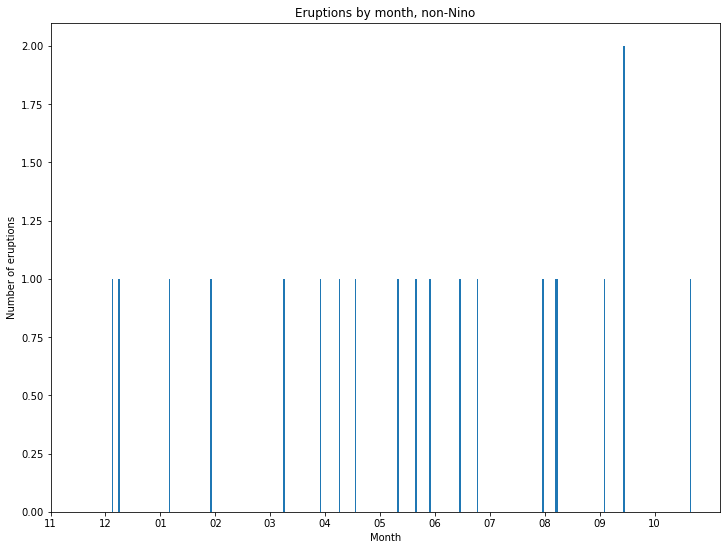

In [9]:
# Breaks up rain by month
erupt_dates = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
plt.figure(figsize=(12,9))

plt.hist(x, bins=365)
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Number of eruptions") 
plt.title('Eruptions by month, non-Nino') 
plt.show() 

In [51]:
erupt_dates = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
print(bin_indices)


[281 202  38 280  89 273 150 318 169  34 318 193 355 210 160 307 129 227
 237  66]


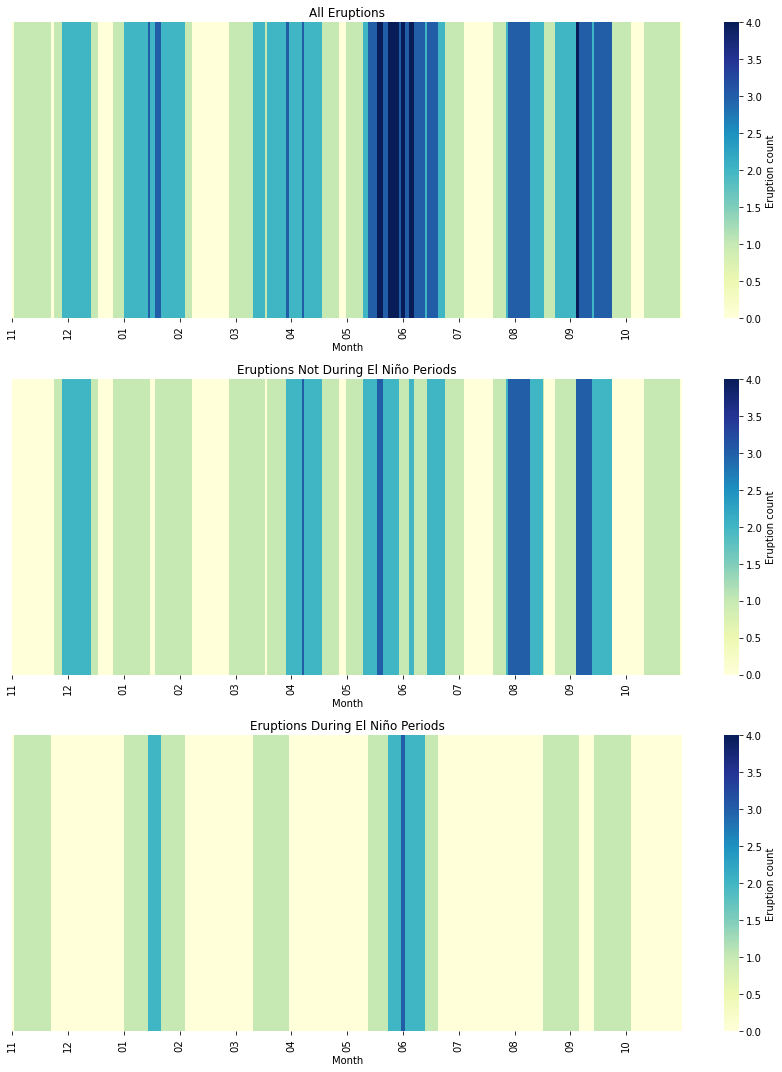

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(12,15))

erupt_dates = eruptions['Start'][eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
data1 = np.zeros((1, 365))
for i in bin_indices:
    for j in range(20):
        data1[0][i-11+j] += 1

# plt.xlabel("Month")
# plt.yticks([])
# plt.xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])

erupt_dates_non_nino = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts_non_nino = np.array(erupt_dates_non_nino.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts_non_nino]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
data2 = np.zeros((1, 365))
for i in bin_indices:
    for j in range(20):
        data2[0][i-11+j] += 1

decimal_erupts_nino = np.array(list(set(decimal_erupts)- set(decimal_erupts_non_nino)))
x = [((i + (2/12)) % 1) for i in decimal_erupts_nino]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
data3 = np.zeros((1, 365))
for i in bin_indices:
    for j in range(20):
        data3[0][i-11+j] += 1

sns.heatmap(data1, ax=axes[0], cbar=True, cbar_kws={"label": "Eruption count"}, annot=False, fmt=".2f", cmap="YlGnBu")
sns.heatmap(data2, ax=axes[1], cbar=True, cbar_kws={"label": "Eruption count"}, annot=False, fmt=".2f", cmap="YlGnBu", vmax=4)
sns.heatmap(data3, ax=axes[2], cbar=True, cbar_kws={"label": "Eruption count"}, annot=False, fmt=".2f", cmap="YlGnBu", vmax=4)

axes[0].set_title("All Eruptions")
axes[1].set_title("Eruptions Not During El Niño Periods")
axes[2].set_title("Eruptions During El Niño Periods")

axes[0].set_xlabel("Month")
axes[1].set_xlabel("Month")
axes[2].set_xlabel("Month")

axes[0].set_yticks([])
axes[1].set_yticks([])
axes[2].set_yticks([])

axes[0].set_xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
axes[1].set_xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
axes[2].set_xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.tight_layout()
plt.savefig("combined_erupts.jpg")
plt.show()

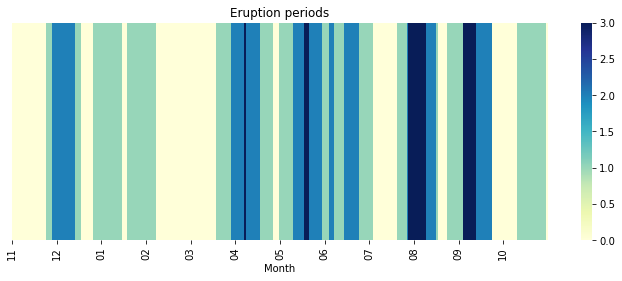

In [11]:
erupt_dates = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
data = np.zeros((1, 365))
for i in bin_indices:
    for j in range(20):
        data[0][i-11+j] += 1
plt.figure(figsize=(12,4))
sns.heatmap(data, annot=False, fmt=".2f", cmap="YlGnBu")
plt.title("Eruption periods")
plt.xlabel("Month")
plt.yticks([])
plt.xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.savefig("non_nino_erupts.jpg")
plt.show()